In [1]:
"""
Murilo Farias CT1004837
Date: 2025-11-03

My dataset has:

VisitDuration, time (in seconds) a customer spends on the website,
PagesVisited, number of pages visited during the session,
ItemsViewed, number of items viewed during the session,
DeviceType, 0 for desktop, 1 for mobile,
AdClicks, number of ads clicked during the session,
CartAdds, number of items added to cart during the session,
Age, customer age,
Gender, 0 for women, 1 for men,
Loc_Burnaby, 0/1 location flag,
Loc_Downtown, 0/1 location flag,
Loc_Kitsilano, 0/1 location flag,
Loc_New Westminster, 0/1 location flag,
Loc_Surrey, 0/1 location flag,
Purchase 0 for no purchase, 1 for purchase.

Implement at least two Ensemble Methods

Choose and apply at least two different ensemble learning techniques from the following options:
-Voting: Combines predictions from multiple models using majority voting (for classification) or averaging (for regression).
-Bagging (Bootstrap Aggregating): Trains multiple instances of the same model on different subsets of data to reduce variance.
-Boosting (e.g., AdaBoost, Gradient Boosting, XGBoost, LightGBM, CatBoost): Sequentially trains weak learners, adjusting weights to focus on misclassified instances and improve predictive accuracy.
-Stacking: Trains multiple base models and combines their outputs using a meta-learner for better predictive power.

"""

'\nMurilo Farias CT1004837\nDate: 2025-11-03\n\nMy dataset has:\n\nVisitDuration, time (in seconds) a customer spends on the website,\nPagesVisited, number of pages visited during the session,\nItemsViewed, number of items viewed during the session,\nDeviceType, 0 for desktop, 1 for mobile,\nAdClicks, number of ads clicked during the session,\nCartAdds, number of items added to cart during the session,\nAge, customer age,\nGender, 0 for women, 1 for men,\nLoc_Burnaby, 0/1 location flag,\nLoc_Downtown, 0/1 location flag,\nLoc_Kitsilano, 0/1 location flag,\nLoc_New Westminster, 0/1 location flag,\nLoc_Surrey, 0/1 location flag,\nPurchase 0 for no purchase, 1 for purchase.\n\nImplement at least two Ensemble Methods\n\nChoose and apply at least two different ensemble learning techniques from the following options:\n-Voting: Combines predictions from multiple models using majority voting (for classification) or averaging (for regression).\n-Bagging (Bootstrap Aggregating): Trains multiple i

In [ ]:
#FIRST APPROACH

#I would like to use
#-Voting: Combines predictions from multiple models using majority voting (for classification)

In [3]:
#libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
#Importing data set

file_path = "C://Users/MuriloFarias/Desktop/GitHub/Python/CLASSE_DEA109/Assignment/vancouver_shopping_dataset.csv"
df = pd.read_csv(file_path)

In [5]:
#checking the columns names
for i in df.columns.tolist():
    print(i)

VisitDuration
PagesVisited
ItemsViewed
DeviceType
AdClicks
CartAdds
Age
Gender
Loc_Burnaby
Loc_Downtown
Loc_Kitsilano
Loc_New Westminster
Loc_Surrey
Purchase


In [6]:
#choosing my features and label
features = ['VisitDuration', 'PagesVisited', 'ItemsViewed', 'DeviceType', 
            'AdClicks', 'CartAdds', 'Age', 'Gender']

X = df[features]
y = df['Purchase']

In [7]:
#spliting in train and test
#train 80% and test 20%, the most common split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
print("\nTraining set size:", X_train.shape)
print("Testing set size:", X_test.shape)


Training set size: (1600, 8)
Testing set size: (400, 8)


In [9]:
#Creating three models
model1 = LogisticRegression(random_state=42, max_iter=1000)
model2 = DecisionTreeClassifier(random_state=42)
model3 = KNeighborsClassifier(n_neighbors=5)

In [10]:
#Create Voting Classifier (combines all models)
voting_clf = VotingClassifier(
    estimators=[
        ('lr', model1),      # Logistic Regression
        ('dt', model2),      # Decision Tree
        ('knn', model3)      # K-Nearest Neighbors
    ],
    voting='hard'  # Use majority voting
)

In [11]:
#training the Voting Classifier, fitting the model
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('lr',
                              LogisticRegression(max_iter=1000,
                                                 random_state=42)),
                             ('dt', DecisionTreeClassifier(random_state=42)),
                             ('knn', KNeighborsClassifier())])

In [12]:
#making predictions using the test dataset 
y_pred = voting_clf.predict(X_test)

In [13]:
#checking the results, evaluating the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Voting Classifier Accuracy: {accuracy:.2f}")

Voting Classifier Accuracy: 0.98


<Figure size 800x600 with 0 Axes>

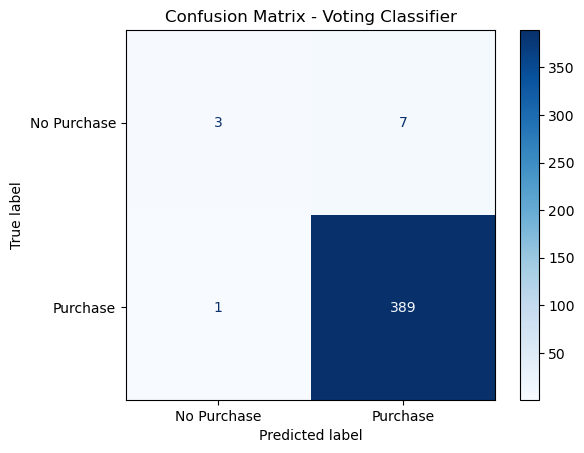

In [22]:
#Confusion matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, 
                               display_labels=['No Purchase', 'Purchase'])
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix - Voting Classifier')
plt.show()

In [23]:
# Extract values (sklearn default order)
tn, fp, fn, tp = cm.ravel()
print(f"\nTrue Negatives (TN - Correct 'No Purchase'): {tn}")
print(f"False Positives (FP - Predicted 'Purchase', Actually 'No Purchase'): {fp}")
print(f"False Negatives (FN - Predicted 'No Purchase', Actually 'Purchase'): {fn}")
print(f"True Positives (TP - Correct 'Purchase'): {tp}")


True Negatives (TN - Correct 'No Purchase'): 3
False Positives (FP - Predicted 'Purchase', Actually 'No Purchase'): 7
False Negatives (FN - Predicted 'No Purchase', Actually 'Purchase'): 1
True Positives (TP - Correct 'Purchase'): 389


In [ ]:
#SECOND APPROACH

#Stacking: Trains multiple base models and combines their outputs using a meta-learner for better predictive power

In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [25]:
file_path = "C://Users/MuriloFarias/Desktop/GitHub/Python/CLASSE_DEA109/Assignment/vancouver_shopping_dataset.csv"
df = pd.read_csv(file_path)

In [26]:
features = ['VisitDuration', 'PagesVisited', 'ItemsViewed', 'DeviceType', 
            'AdClicks', 'CartAdds', 'Age', 'Gender']

X = df[features]
y = df['Purchase']

In [28]:
#splitting data into training and testing sets
#80% train and 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)

Training set size: (1600, 8)
Testing set size: (400, 8)


In [30]:
base_models = [
    ('dt', DecisionTreeClassifier(random_state=42)),
    ('knn', KNeighborsClassifier(n_neighbors=5)),
    ('svm', SVC(kernel='rbf', probability=True, random_state=42))
]

In [31]:
#creating the meta  learner
meta_learner = LogisticRegression(random_state=42, max_iter=1000)

In [32]:
#creating the Stacking Classifier
stacking_clf = StackingClassifier(
    estimators=base_models,
    final_estimator=meta_learner,
    cv=5  # 5-fold cross-validation for base models
)

In [33]:
#training the stacking classifier
#fiting the model
stacking_clf.fit(X_train, y_train)

StackingClassifier(cv=5,
                   estimators=[('dt', DecisionTreeClassifier(random_state=42)),
                               ('knn', KNeighborsClassifier()),
                               ('svm', SVC(probability=True, random_state=42))],
                   final_estimator=LogisticRegression(max_iter=1000,
                                                      random_state=42))

In [34]:
#making predictions

y_pred = stacking_clf.predict(X_test)

In [36]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f})")

Accuracy: 0.9900)


<Figure size 800x600 with 0 Axes>

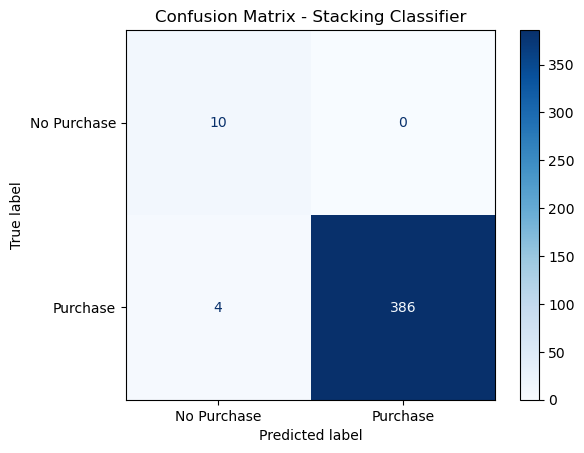

In [37]:
#addiong confusion matrix to evaluate the model
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, 
                               display_labels=['No Purchase', 'Purchase'])
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix - Stacking Classifier')
plt.show()

In [ ]:
#based on the result of both appoaches, 
# I would choose the Stacking Classifier 
# as it provided a higher accuracy and better performance 
# in predicting customer purchases on the e-commerce website.
